In [1]:
# ! pip install numpy 
# ! pip install qiskit
# ! pip install matplotlib

In [2]:
from qiskit import QuantumCircuit, execute, Aer, BasicAer
from qiskit.visualization import plot_histogram

import numpy as np


Making f_1(x) = 1  for x  = {10, 11}   
Making f_2(x) = 1  for x  = {01, 10, 11}

WHere 
x = qj qj-1 ... q2 q1

In [3]:
n = 2

f1 = QuantumCircuit(n+1, name='f1')

# Applying the x gate to ancilla for when f_1 = 1 
f1.cx(1,2)


display(f1.draw())


f2 = QuantumCircuit(n+1, name='f2')

# Applying the x gate to ancilla for when f_1 = 1 
f2.cx(0,2)
f2.cx(1,2)

f2.ccx(0,1,2)

display(f2.draw())

q_0: ─────
          
q_1: ──■──
     ┌─┴─┐
q_2: ┤ X ├
     └───┘

q_0: ──■─────────■──
       │         │  
q_1: ──┼────■────■──
     ┌─┴─┐┌─┴─┐┌─┴─┐
q_2: ┤ X ├┤ X ├┤ X ├
     └───┘└───┘└───┘

DJ for balanced function f1

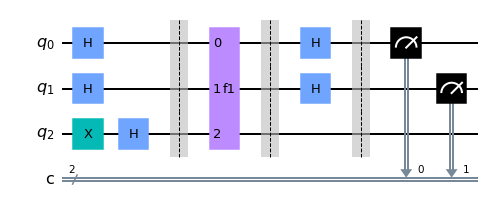

In [4]:
dj = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj.h(qubit)
    
# Put ancilia qubit in state |->
dj.x(n)
dj.h(n)


dj.barrier()

# Add oracle corresponding to the fucntion
dj.append(f1, [*range(n+1)])

dj.barrier()

# Repeat H-gates
for qubit in range(n):
    dj.h(qubit)
dj.barrier()

# Measure
for i in range(n):
    dj.measure(i, i)

# Display circuit
dj.draw('mpl')

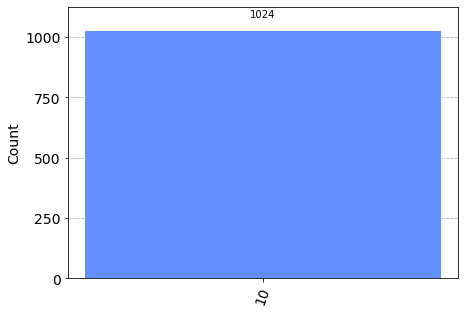

In [5]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

# Since we measure the state |00> with probability 0, the funciton is balanced as expected

DJ for biased function f2

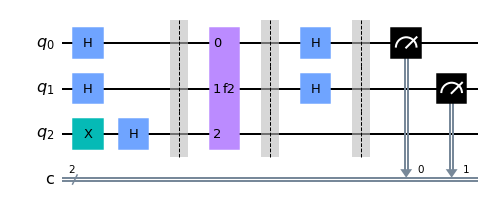

In [6]:
dj = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj.h(qubit)
    
# Put ancilia qubit in state |->
dj.x(n)
dj.h(n)


dj.barrier()

# Add oracle corresponding to the fucntion
dj.append(f2, [*range(n+1)])

dj.barrier()

# Repeat H-gates
for qubit in range(n):
    dj.h(qubit)
dj.barrier()

# Measure
for i in range(n):
    dj.measure(i, i)

# Display circuit
dj.draw('mpl')

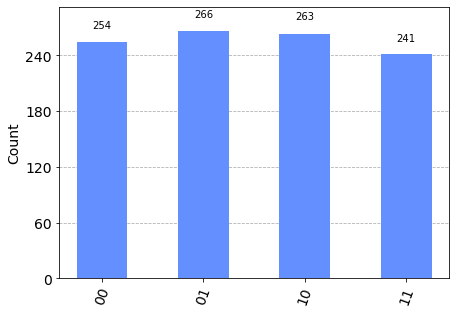

In [7]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)

# Since we measure the state |00> with probability ~0.25, the function is biased as expected

DJ for biased functions f1 and f2

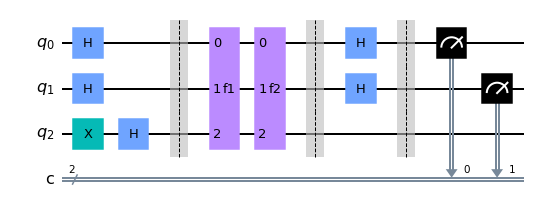

In [8]:
dj = QuantumCircuit(n+1, n)

# Apply H-gates
for qubit in range(n):
    dj.h(qubit)
    
# Put ancilia qubit in state |->
dj.x(n)
dj.h(n)


dj.barrier()

# Add oracle corresponding to the function
dj.append(f1, [*range(n+1)])
dj.append(f2, [*range(n+1)])

dj.barrier()

# Repeat H-gates
for qubit in range(n):
    dj.h(qubit)
dj.barrier()

# Measure
for i in range(n):
    dj.measure(i, i)

# Display circuit
dj.draw('mpl')

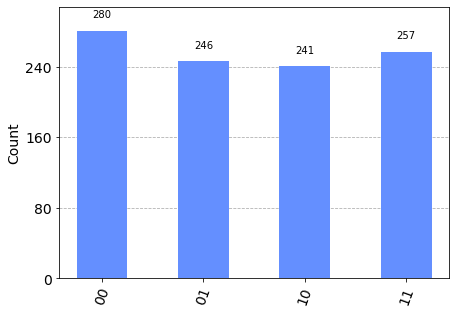

In [9]:
# use local simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(dj, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)


Since we measure the state |00> with probability > 0 the function is biased 

This is also expected since the functionstake unitary form,

f3(x) = f1(x)*f2(x)

And it can be easily shown that the produc of balanced fucniton with a iased fundtion will alwasy lead to a biased function